In [2]:
import anndata
import scanpy as sc
#import scvi
import h5py
import scipy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ad_atac = anndata.read_h5ad('/home/yuanh/sc_basset/datasets/10x_ARC_PBMC/ad_atac.h5ad')
ad_rna = anndata.read_h5ad('/home/yuanh/sc_basset/datasets/10x_ARC_PBMC/scvi/ad_rna_scvi.h5ad')
ad_atac.obs['leiden_rna'] = ad_rna.obs['leiden'].values


In [4]:
pvi = scvi.model.PEAKVI.load("trained_model", ad_atac)
latent = pvi.get_latent_representation()
pd.DataFrame(latent).to_csv('projection.csv')

ad_atac.obsm["projection"] = latent
sc.pp.neighbors(ad_atac, use_rep="projection")
sc.tl.umap(ad_atac)
ad_atac.write('ad_scvi.h5ad')

INFO     .obs[_scvi_batch] not found in target, assuming every cell is same category         
INFO     .obs[_scvi_labels] not found in target, assuming every cell is same category        
INFO     Using data from adata.X                                                             


/home/yuanh/my_envs/scvi/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    
INFO     Successfully registered anndata object containing 4881 cells, 37647 vars, 1 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


### plot

/home/yuanh/.local/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/yuanh/.local/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


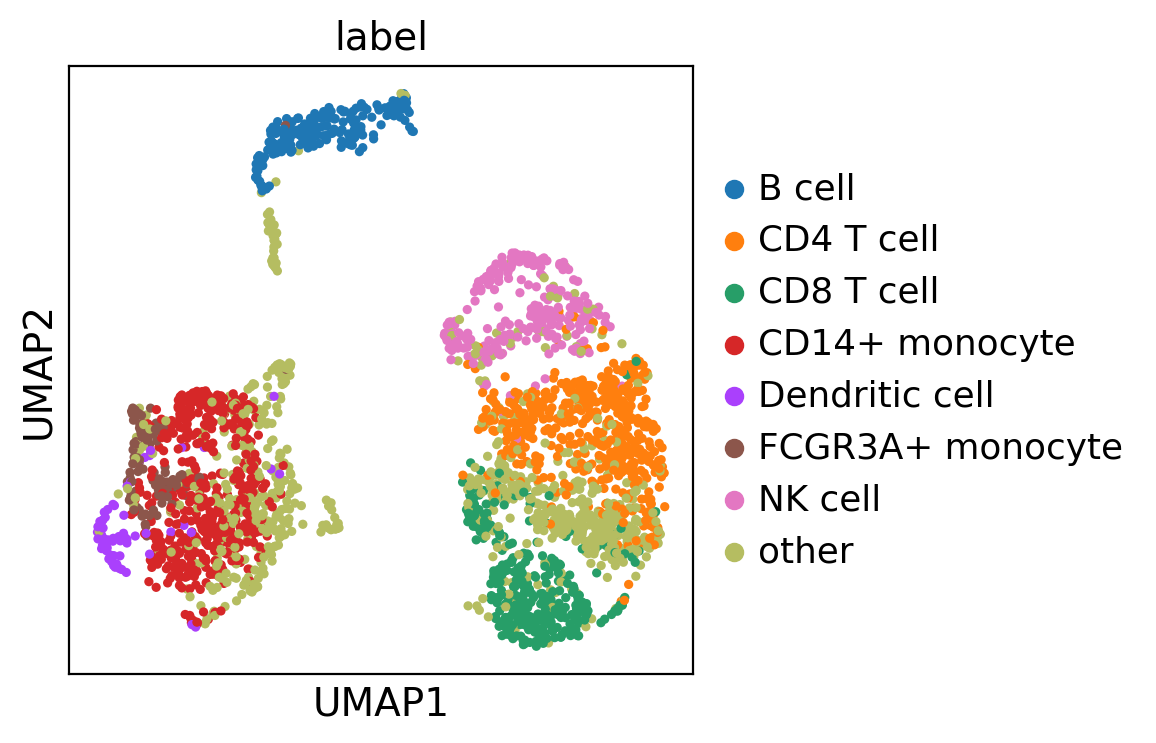

In [3]:
ad_atac = anndata.read_h5ad('/home/yuanh/sc_basset/datasets/10x_ARC_PBMC/ad_atac.h5ad')
ad_rna = anndata.read_h5ad('/home/yuanh/sc_basset/10x_ARC_PBMC/adam_32/interpret/annotation/ad_scvi_annotate.h5ad')
ad_atac.obs['label']=ad_rna.obs['cell_type']

sc.set_figure_params(vector_friendly=True, format='pdf', dpi=100)
ad_atac.obsm['projection'] = pd.read_csv('projection.csv', index_col=0).values
sc.pp.neighbors(ad_atac, use_rep='projection')
sc.tl.umap(ad_atac)

f = sc.pl.umap(ad_atac, color=['label'], return_fig=True)
f.savefig('umap_label.pdf')